# An Application of Chebyshev's Sum Inequality

*Published May 5, 2025*

I came across the following exercise in a textbook.

Let $p_i$, $i = 1, \dots, n$, be real numbers with $0 \le p_1 \le \dots \le p_n$ and $\sum_{i=1}^n p_i = 1$. Then it holds that
$$
\sum_{i=1}^r p_i \le \frac{r}{n}
$$
for all $r \in \{1, \dots, n\}$.

We can interpret the $p_i$ as probabilities of elementary events in a discrete probability space. Then the statement says that the cumulative probability of the $r$ least likely events is at most as large as it would be under a uniform distribution, i.e., $r/n$.

There is a simple proof of this statement using **Chebyshev's sum inequality**. This should not be confused with **Chebyshev's inequality** from probability theory, which is better known among statisticians. A variant of Chebyshev's sum inequality is formulated in the following proposition.

**Proposition** (Chebyshev's sum inequality). Let $a_1 \le \dots \le a_n$ and $b_1 \ge \dots \ge b_n$ be real numbers. Then
$$
\frac{1}{n} \sum_{i=1}^n a_i b_i \le \left( \frac{1}{n} \sum_{i=1}^n a_i \right) \left( \frac{1}{n} \sum_{i=1}^n b_i \right).
$$

Pretty simple, right? The key point is that the two $n$-tuples $(a_i : i = 1, \dots, n)$ and $(b_i : i = 1, \dots, n)$ are oppositely ordered. The proof is very straightforward and immediately reveals where the inequality comes from.

*Proof.* For any $i, j \in \{1, \dots, n\}$, clearly either $a_i - a_j \le 0$ and $b_i - b_j \ge 0$, or $a_i - a_j \ge 0$ and $b_i - b_j \le 0$. In both cases,
$$
(a_i - a_j)(b_i - b_j) \le 0,
$$
and hence
$$
\sum_{i=1}^n \sum_{j=1}^n (a_i - a_j)(b_i - b_j) \le 0.
$$
Now, expand and rearrange the terms. After simplifying, you obtain the desired inequality. $\blacksquare$

With this result, our original statement is easy to prove. Denote by $[\dots]$ the indicator function. Then
$$
\sum_{i=1}^r p_i = \sum_{i=1}^n [i \le r] \, p_i.
$$
By assumption, $a_i \equiv n p_i$ is monotonically increasing, and similarly, $b_i \equiv [i \le r]$ is clearly monotonically decreasing. Thus, the conditions for Chebyshev's sum inequality are satisfied, and we get
$$
\sum_{i=1}^r p_i = \frac{1}{n} \sum_{i=1}^n (n p_i) [i \le r] \le \left( \frac{1}{n} \sum_{i=1}^n (n p_i) \right) \left( \frac{1}{n} \sum_{i=1}^n [i \le r] \right) = \frac{r}{n},
$$
where we have used that $\sum_{i=1}^n p_i = 1$.


In [1]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

In [2]:
n: int = 7

p = scipy.stats.dirichlet.rvs(alpha=np.ones((n,)), size=1).flatten()
p = p[np.argsort(p)]

p_cumulative = np.cumsum(p)

unif_cumulative = np.arange(1, n + 1) / n

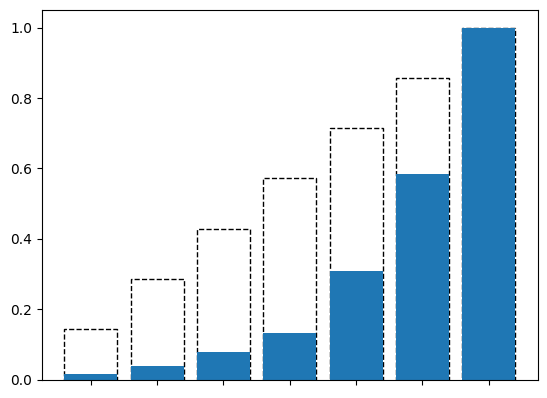

In [3]:
fig, ax = plt.subplots()
dom = np.arange(n)
ax.bar(dom, unif_cumulative, edgecolor="black", linestyle="--", color="white")
ax.bar(dom, p_cumulative)
ax.set_xticks(dom)
ax.set_xticklabels([])
plt.show()